### About Dataset
This dataset contains historical data from a health insurance company. It can be used to extract meaningful insights through data analytics to support decision-making processes within the insurance company. The primary business objective for this dataset is insurance forecasting. The dataset is in CSV format and is available from the online platform: https://www.kaggle.com/datasets/mirichoi0218/insurance (Kaggle - Medical Cost Personal Datasets)

## __Project Title__: EDA and Deriving Insights from Individual Medical Insurance Cost Dataset

**Summary**: This project will explore the 'insurance.csv' dataset by conducting Exploratory Data Analysis (EDA) to understand each variable and the relationships between them. Based on our findings from the EDA, we will formulate key insights of this dataset as well as our recommendation and hypotheses for further investigation in the 'Insights and Recommendations' section.

**Scenario**: As a data scientist for an insurance company in the United States, I have been tasked with analyzing the total claim amounts for healthcare insurance of the company's customers. The goal is to identify the factors those could influence healthcare costs in the U.S. to aid future decision-making in the company's business strategies by interpreting the data.

**Description of Dataset Features**:

- age : The age of the primary beneficiary.
- sex : The gender of the insurance contractor.
- bmi : The body mass index of the beneficiary.
- children : Number of children or number of dependents covered by health insurance.
- smoker: Smoking Status of the beneficiary.
- region : The area where the beneficiary resides in the United States.
- charges : The individual medical costs billed by the health insurance company.



## __Dataset Understanding__

In [ ]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import pearsonr, spearmanr
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [ ]:
# Load the Dataset
# file_path = '../local/insurance.csv'
# df = pd.read_csv(file_path)

from google.colab import drive
drive.mount('/content/drive')

file_path = '/content/drive/My Drive/dataset/insurance.csv'
df = pd.read_csv(file_path)

cols = ['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']
df.columns = cols
df.head()

Mounted at /content/drive


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
# Finding whether any null value
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
categorical_col = ['sex', 'smoker', 'region']
numerical_col = ['age', 'bmi', 'children', 'charges']

print("\nUnique values in each categorical columns:")
print("sex : {}".format(df.sex.unique()))
print("smoker : {}".format(df.smoker.unique()))
print("region : {}".format(df.region.unique()))


Unique values in each categorical columns:
sex : ['female' 'male']
smoker : ['yes' 'no']
region : ['southwest' 'southeast' 'northwest' 'northeast']


#### **Summary of this Section**

Features:
1. age: Specifies the age of the person whose health costs are covered by the insurance.

2. sex: Specifies the gender of the person who owns and manages the insurance policy. (Female / Male)

3. bmi: Indicates the BMI of the person whose health is being insured. Ideal bmi is between 18.5 to 24.9.

4. children: Specifies the number of dependents covered under the insurance policy.

5. smoker: Indicates whether the primary beneficiary smokes. (Yes / No)

6. region: Specifies the region where the primary beneficiary resides. (Northeast, Northwest, Southeast, Southwest)

7. charges: Specifies the medical expenses incurred by the primary beneficiary and covered by the insurance.

- There are 1338 observations and a total of 7 features in the dataset. The features including 'age', 'sex', 'bmi', children', 'smoker', 'region' and 'charges'. 4 of them are numerical, and 3 of them are categorical.

- The primary beneficiary is the individual who receives the primary benefits of the health insurance policy. This person is typically the one whose health and medical expenses are covered by the policy. Meanwhile, the insurance contractor is the person who owns the insurance policy and is responsible for paying the insurance fee. This individual may or may not be the same as the primary beneficiary. Therefore, Primary Beneficiary Attributes: age, bmi, smoker, region, charges; Insurance Contractor Attribute: sex, children.

- Since the focus is on understanding the factors impacting the healthcare cost, the target variable is 'charges'.

- There are no missing values found in the default dataset.

- Qualitative Data/Categorical Data:
  - Nomimal Data= ['sex', 'smoker', 'region'].
- Quantitative Data/Numerical Data:
  - Discrete Data(in the form of integers) = ['age', 'children']
  - Continuous Data (in the form of fractions or decimals)= ['age', 'charges'].

## __Data Preprocessing__

<Axes: >

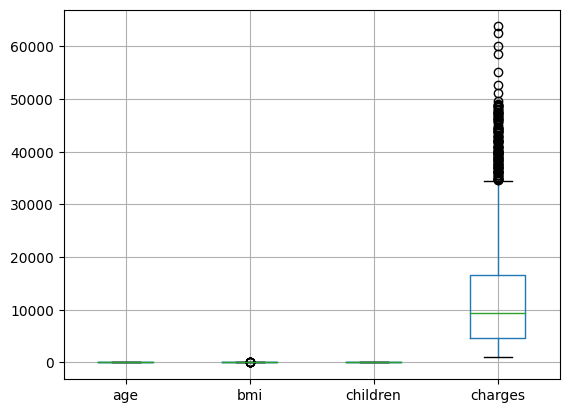

In [ ]:
# Find outliers
df.boxplot()

In [ ]:
from scipy import stats

# Remove the rows that have outliers in at least one column
df = df[np.abs(stats.zscore(df['age'])) < 3]
print('After remove outlier(s) in age column : {}'.format(df.shape))

df = df[np.abs(stats.zscore(df['bmi'])) < 3]
print('After remove outlier(s) in bmi column : {}'.format(df.shape))

df = df[np.abs(stats.zscore(df['children'])) < 3]
print('After remove outlier(s) in children column : {}'.format(df.shape))

df = df[np.abs(stats.zscore(df['charges'])) < 3]
print('After remove outlier(s) in charges column : {}'.format(df.shape))

After remove outlier(s) in age column : (1338, 7)
After remove outlier(s) in bmi column : (1334, 7)
After remove outlier(s) in children column : (1316, 7)
After remove outlier(s) in charges column : (1309, 7)


In [ ]:
# One-Hot Encoding
encoded_df = pd.get_dummies(data=df, columns=['sex', 'smoker', 'region'])
encoded_df.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,True,False,False,True,False,False,False,True
1,18,33.770,1,1725.55230,False,True,True,False,False,False,True,False
2,28,33.000,3,4449.46200,False,True,True,False,False,False,True,False
3,33,22.705,0,21984.47061,False,True,True,False,False,True,False,False
4,32,28.880,0,3866.85520,False,True,True,False,False,True,False,False


### **Explanation For This Section**

- Since there are no missing values found in the dataset, there is no need to handle missing values.

- The boxplot was plotted to find the outliers in the dataset. There seem to be a few outliers in each feature. The Z-score is a commonly used statistical measure to identify outliers by indicating how many standard deviations a data point is away from the mean. In this project, the threshold value is set to 3 for filtering. For a normal distribution, it is estimated that 99.7% of the data points will fall within three standard deviations from the mean. Typically, Z-scores greater than 3 or less than -3 are considered extreme and indicative of outliers. Thus, for this dataset, any data point with a Z-score greater than 3 or less than -3 is considered an outlier.

- The rows containing outliers are removed from the dataset to ensure they do not affect the analysis later. There are a total of 29 outliers found within features 'age', 'bmi', 'children' and 'charges', which has been removed according to the filtering criteria. With that the number of samples has reduced to 1,309.

- The three categorical features are nominal variables, meaning they do not have any inherent order or quantitative value. Therefore, One-Hot Encoding is used to convert these categorical variables, as it is especially useful for nominal variables.

- Binary features created by One-Hot Encoding are simple to understand. For each unique value in a column, a new column is created. The values in this column are represented as 1s and 0s to indicate whether the value matches the column header (1 for 'matched', 0 for 'not matched').

- Encoding technique is used to make the analysis later more interpretable and informative.

## __Exploratory Data Analysis (EDA)__

### Univariate Analysis

#### [Numerical Features]

##### Feature : 'age'

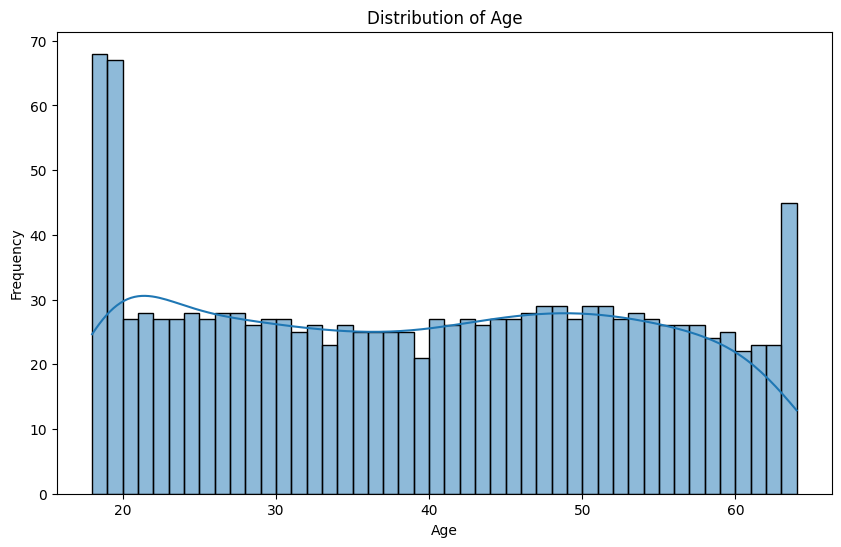

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(encoded_df['age'], bins=46, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

##### Feature : 'BMI'

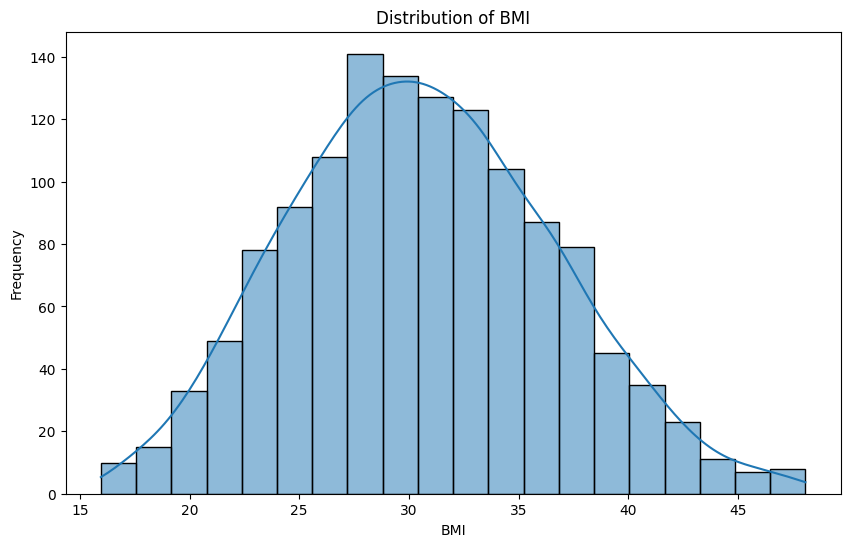

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(encoded_df['bmi'], bins=20, kde=True)
plt.title('Distribution of BMI')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()

##### Feature : 'children'

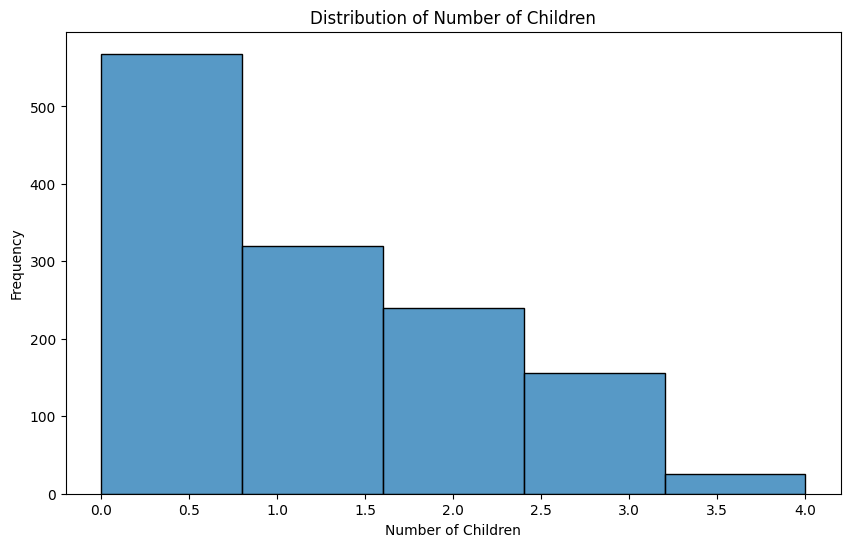

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(encoded_df['children'], bins=5)
plt.title('Distribution of Number of Children')
plt.xlabel('Number of Children')
plt.ylabel('Frequency')
plt.show()

##### Feature : 'charges'

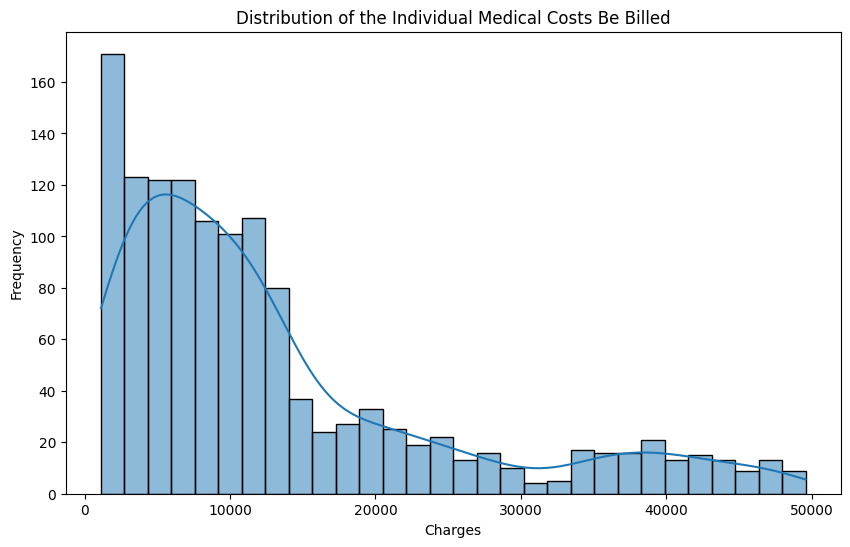

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(encoded_df['charges'], bins=30, kde=True)
plt.title('Distribution of the Individual Medical Costs Be Billed')
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.show()

##### Summary Statistics (Numerical Features)

In [ ]:
df.describe()

,age,bmi,children,charges
count,1309.000000,1309.000000,1309.000000,1309.000000
mean,39.262032,30.584037,1.045073,13089.622269
std,14.085397,5.975320,1.124627,11738.168486
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.315000,0.000000,4686.388700
50%,39.000000,30.305000,1.000000,9377.904700
75%,51.000000,34.580000,2.000000,16577.779500
max,64.000000,48.070000,4.000000,49577.662400


##### Summary:

- 'age': It is a numerical, discrete variable represented as integers. Its values range from 18 to 64, with a mean of 39.26 and a standard deviation of 14.09. From the plotted graph, the distribution appears uniform for ages between 20 and 63.

- 'bmi': It is a numerical, continuous variable with decimal values. The values range from 15.96 to 48.07, with a mean of 30.58 and a standard deviation of 5.98. Its distribution is approximately Gaussian as it displays a symmetric, bell-shaped curve.

- 'children': It is a numerical, discrete variable. The values range from 0 to 4, with a mean of 1.05 and a standard deviation of 1.12. The distribution is reverse J-shaped, which indicates more instances with fewer children.

- 'charges': It is a numerical, continuous variable. The values range from 1121.87 to 49577.66, with a mean of 13089.62 and a standard deviation of 11738.17. The distribution is lognormal, skewed to the right, with most charges falling below about 22000 units.

#### [Categorical Features]

##### Feature : 'sex'

plt.figure(figsize=(8,6))
sns.countplot(df['sex'])
plt.title('Distribution of Sex', fontsize=12)
plt.xlabel('Sex', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

<Axes: title={'center': 'Distribution of Sex'}>

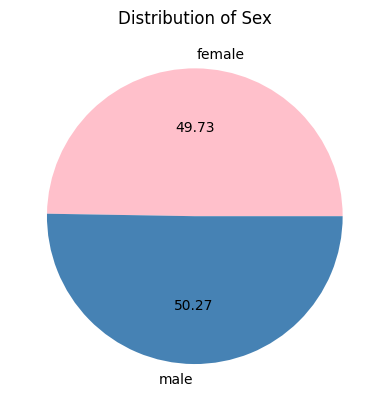

In [ ]:
df.groupby('sex').size().plot(kind='pie', autopct='%.2f', ylabel='', title='Distribution of Sex', colors=["pink", "steelblue"])

##### Feature : 'smoker'

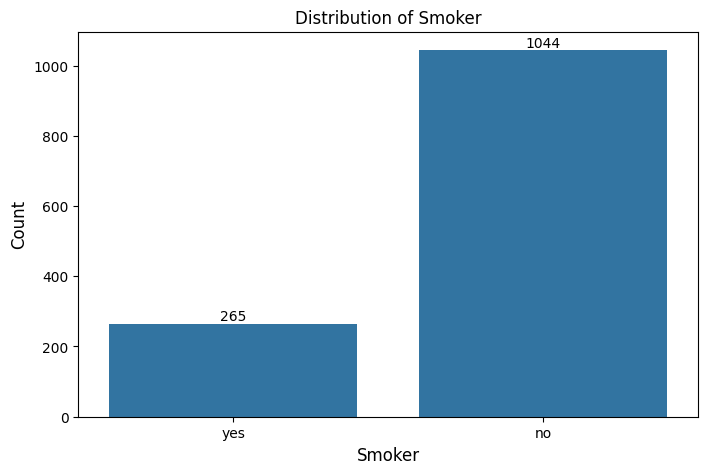

In [ ]:
plt.figure(figsize=(8,5))
ax=sns.countplot(x='smoker', data=df)
ax.bar_label(ax.containers[0])
plt.title('Distribution of Smoker', fontsize=12)
plt.xlabel('Smoker', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

##### Feature : 'region'

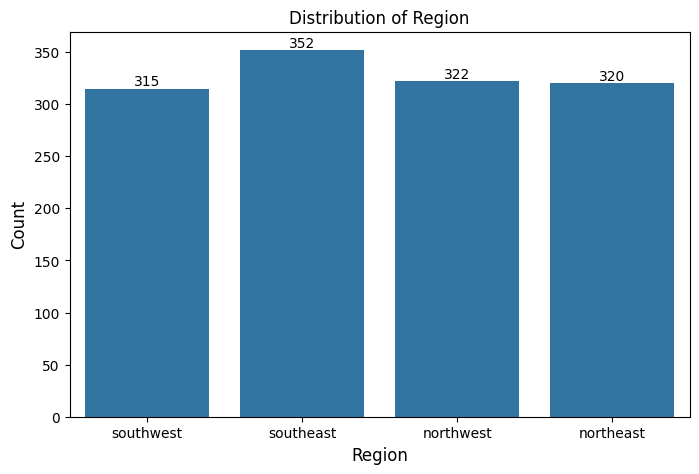

In [ ]:
plt.figure(figsize=(8,5))
ax=sns.countplot(x='region', data=df)
ax.bar_label(ax.containers[0])
plt.title('Distribution of Region', fontsize=12)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

##### Summary Statistics (Categorical Features)

In [ ]:
print("{}".format(df.select_dtypes(include=['object']).describe()))

         sex smoker     region
count   1309   1309       1309
unique     2      2          4
top     male     no  southeast
freq     658   1044        352


##### Summary:

- 'sex': It is a categorical variable with unique values 'female' and 'male'. There are 658 male samples, which constitute about 50.27% of the data, and 651 female samples, making up 49.73% of the data. Since the categories have nearly equal representation, the data is fairly balanced in terms of gender.

- 'smoker': it is a categorical variable with two unique values: smoker ('yes') and non-smoker ('no'). There are 1044 samples of non-smokers and 265 samples of smokers in the dataset Non-smokers are overrepresented, while smokers are underrepresented.

- 'region': It is a categorical variable with unique values 'southwest', 'southeast', 'northwest', and 'northeast'. The southeast region has the highest count with 352 samples, while the other three regions have counts ranging from 315 to 322. This distribution is considered fairly represented.


### Bivariate Analysis

#### [Numerical Features]

<Figure size 1200x1500 with 0 Axes>

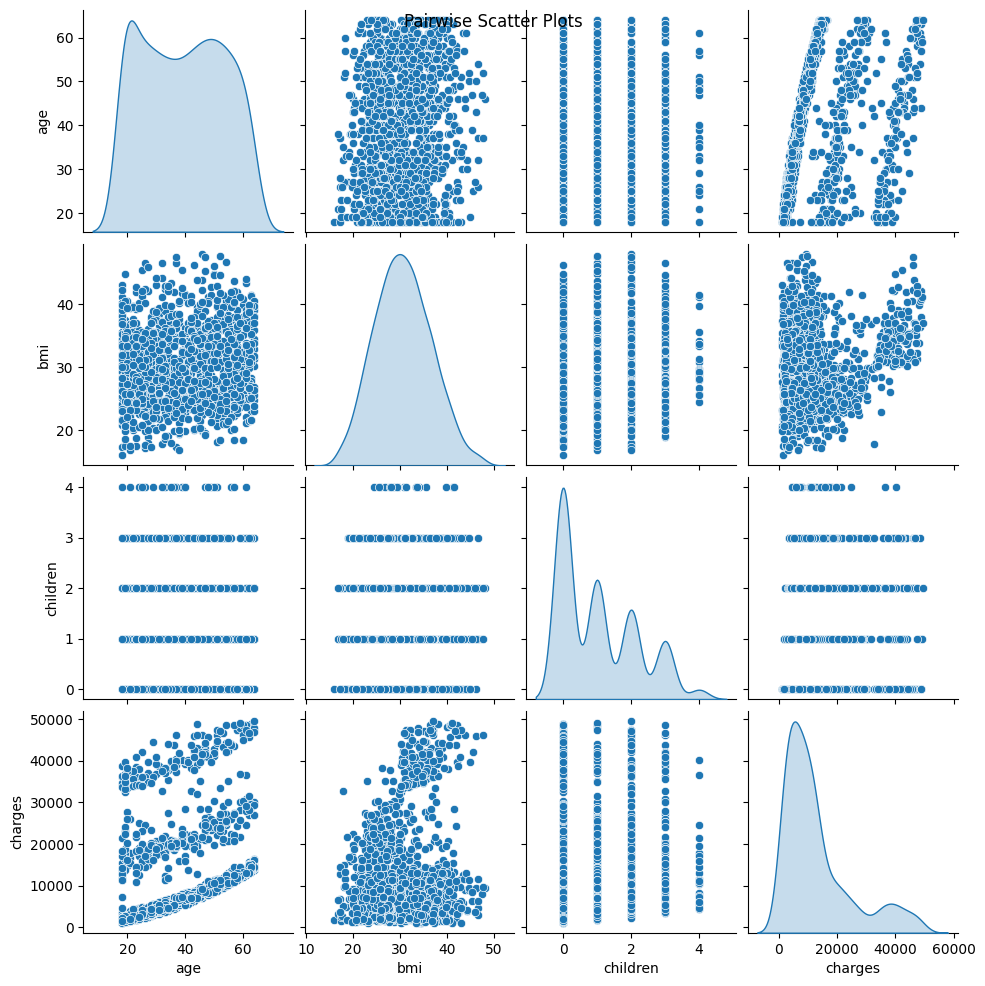

In [ ]:
plt.figure(figsize=(12, 15))
sns.pairplot(encoded_df[numerical_col], diag_kind='kde')
plt.suptitle("Pairwise Scatter Plots")
plt.show()

Correlation Matrix:
               age       bmi  children   charges
age       1.000000  0.118178  0.059100  0.305263
bmi       0.118178  1.000000  0.029916  0.191453
children  0.059100  0.029916  1.000000  0.100438
charges   0.305263  0.191453  0.100438  1.000000


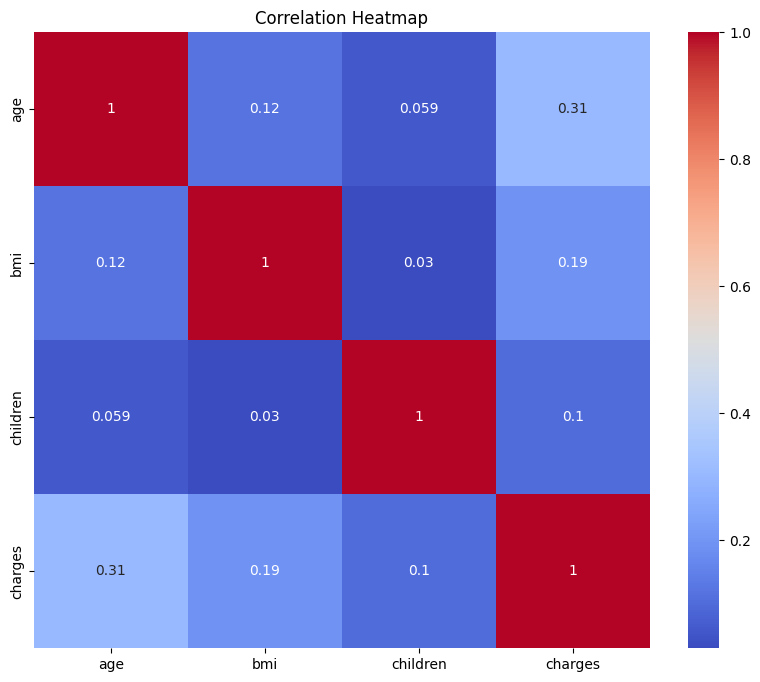

In [ ]:
corr_matrix = encoded_df[numerical_col].corr(method='pearson')
print("Correlation Matrix:")
print(corr_matrix)
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title("Correlation Heatmap")
plt.show()

##### Summary:

- The correlation matrix represents the relationship between two variables, ranging from -1 to 1. A correlation coefficient closer to 1 or -1 indicates a strong correlation, which is useful for understanding variable relationships. From the correlation matrix above, it appears that overall, the variables in the dataset are not highly correlated with each other. Among the numerical features, the strongest correlation is between charges and age (+0.31), followed by charges and bmi (+0.19), and bmi and age (+0.12).

- From the scatter plots, it is apparent that charges and age have a positive relationship. As age increases, charges also increase. Most of the higher charges (over 30,000) are associated with samples where the BMI is over 30.

#### [Categorical Features]

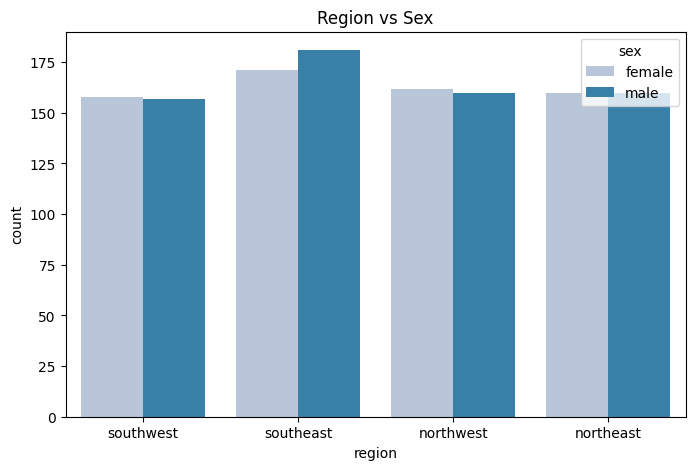

In [ ]:
encoded_categorical_col = ['sex_female','sex_male', 'smoker_yes', 'smoker_no', 'region_southwest', 'region_southeast', 'region_northwest','region_northeast']

plt.figure(figsize=(8,5))
sns.countplot(x='region', hue='sex', palette='PuBu', data=df)
plt.title("Region vs Sex")
plt.show()

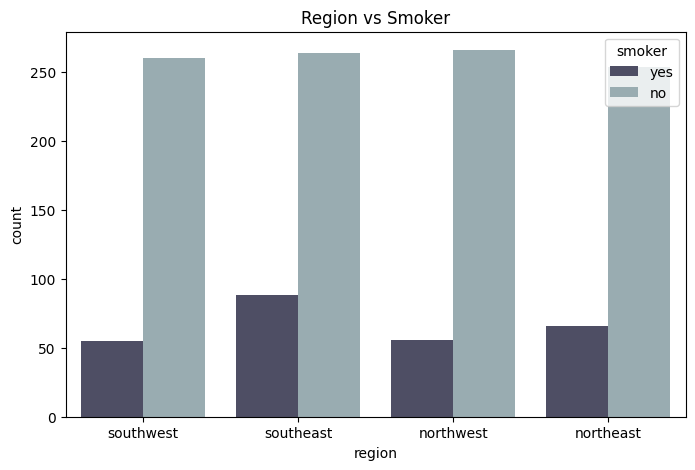

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(x='region', hue='smoker', palette='bone', data=df)
plt.title("Region vs Smoker")
plt.show()

<Axes: title={'center': 'Smoker vs Sex'}, xlabel='smoker'>

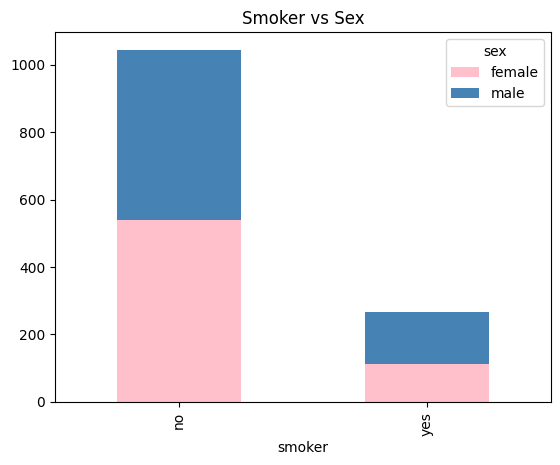

In [ ]:
df.groupby(['smoker', 'sex']).size().unstack().plot(kind='bar', stacked=True, color=['pink', 'steelblue'], title ='Smoker vs Sex')

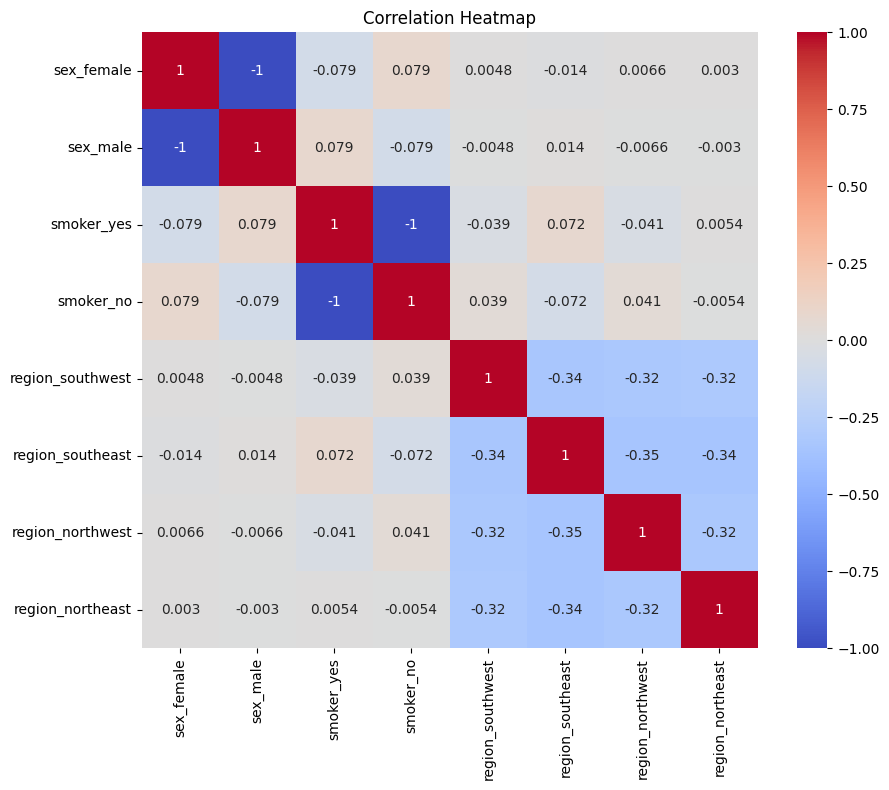

In [ ]:
corr_matrix = encoded_df[encoded_categorical_col].corr(method='pearson')
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title("Correlation Heatmap")
plt.show()

##### Summary:

- The sex distribution in each region appears fairly balanced.
- The southeast region has relatively more smokers compared to the other three regions.
- For both smokers and non-smokers, the distribution of females and males is approximately equal.
- Overall, there is no strong correlation among the categorical features.

#### [Categorical Features & Numerical Features]

<ipython-input-25-57b3458060ed>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(encoded_df, x='smoker_yes', y='charges', palette='BuPu', ax=axs[0])
<ipython-input-25-57b3458060ed>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(encoded_df, x='smoker_no', y='charges', palette='BuPu', ax=axs[1])


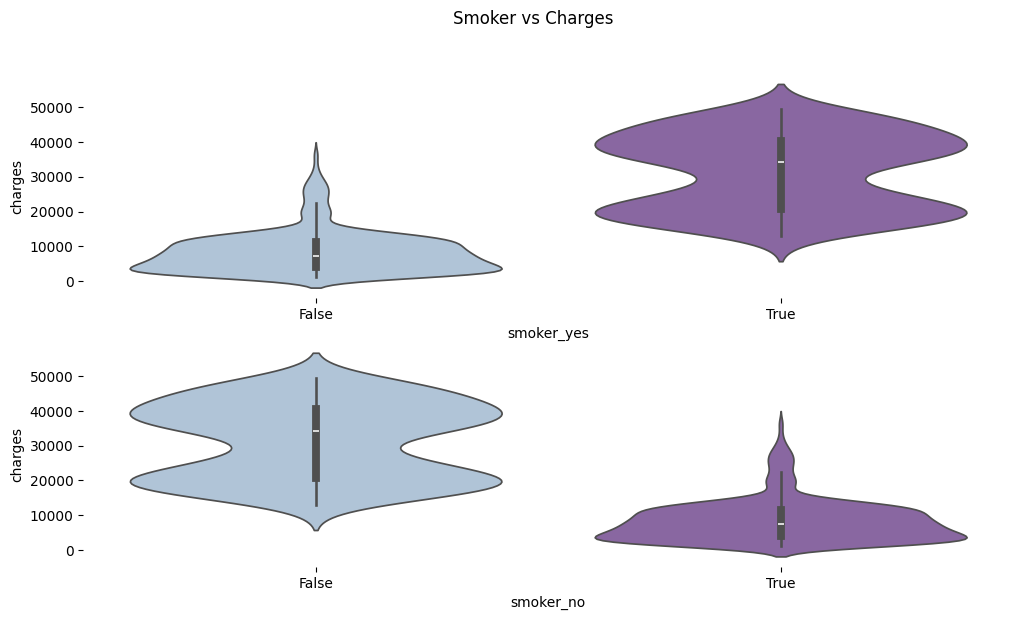

In [ ]:
fig, axs = plt.subplots(2, figsize=(12, 3.2 * len(encoded_df['smoker_yes'].unique())))
fig.suptitle('Smoker vs Charges')

axs[0].plot
sns.violinplot(encoded_df, x='smoker_yes', y='charges', palette='BuPu', ax=axs[0])
sns.despine(top=True, right=True, bottom=True, left=True, ax=axs[0])

axs[1].plot
sns.violinplot(encoded_df, x='smoker_no', y='charges', palette='BuPu', ax=axs[1])
sns.despine(top=True, right=True, bottom=True, left=True, ax=axs[1])

<ipython-input-26-38f2196b7369>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(encoded_df, x='age', y='smoker_yes', inner='box', palette='Paired', ax=axs[0])
<ipython-input-26-38f2196b7369>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(encoded_df, x='age', y='smoker_no', inner='box', palette='Paired', ax=axs[1])


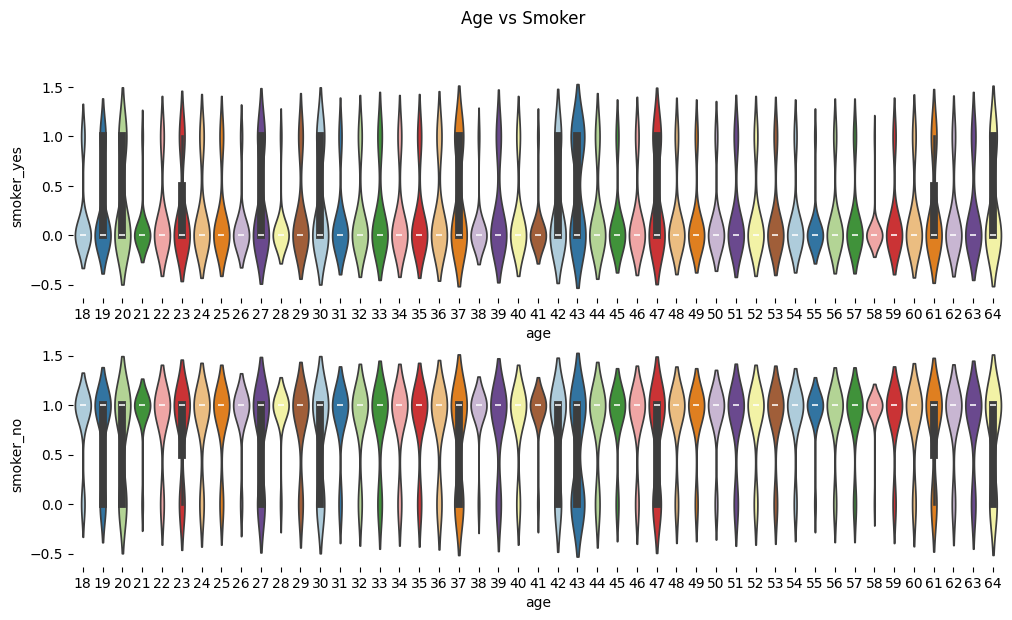

In [ ]:
fig, axs = plt.subplots(2, figsize=(12, 3.2 * len(encoded_df['smoker_yes'].unique())))
fig.suptitle('Age vs Smoker')

axs[0].plot
sns.violinplot(encoded_df, x='age', y='smoker_yes', inner='box', palette='Paired', ax=axs[0])
sns.despine(top=True, right=True, bottom=True, left=True, ax=axs[0])

axs[1].plot
sns.violinplot(encoded_df, x='age', y='smoker_no', inner='box', palette='Paired', ax=axs[1])
sns.despine(top=True, right=True, bottom=True, left=True, ax=axs[1])

<ipython-input-27-a7acb1098cb7>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(encoded_df, x='age', y='sex_female', inner='box', palette='Paired', ax=axs[0])
<ipython-input-27-a7acb1098cb7>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(encoded_df, x='age', y='sex_male', inner='box', palette='Paired', ax=axs[1])


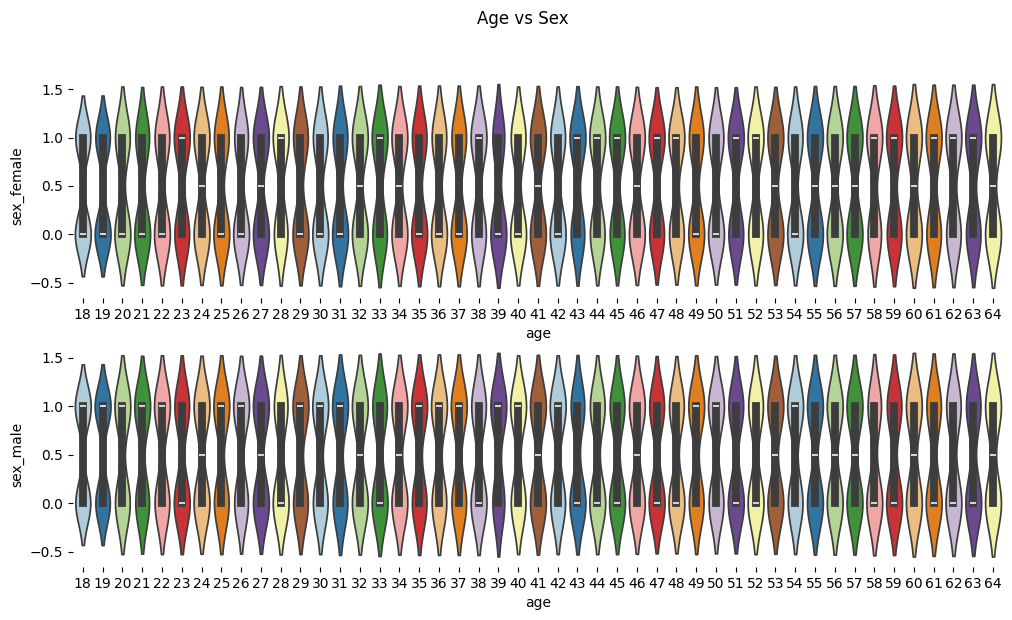

In [ ]:
fig, axs = plt.subplots(2, figsize=(12, 3.2 * len(encoded_df['sex_male'].unique())))
fig.suptitle('Age vs Sex')

axs[0].plot
sns.violinplot(encoded_df, x='age', y='sex_female', inner='box', palette='Paired', ax=axs[0])
sns.despine(top=True, right=True, bottom=True, left=True, ax=axs[0])

axs[1].plot
sns.violinplot(encoded_df, x='age', y='sex_male', inner='box', palette='Paired', ax=axs[1])
sns.despine(top=True, right=True, bottom=True, left=True, ax=axs[1])

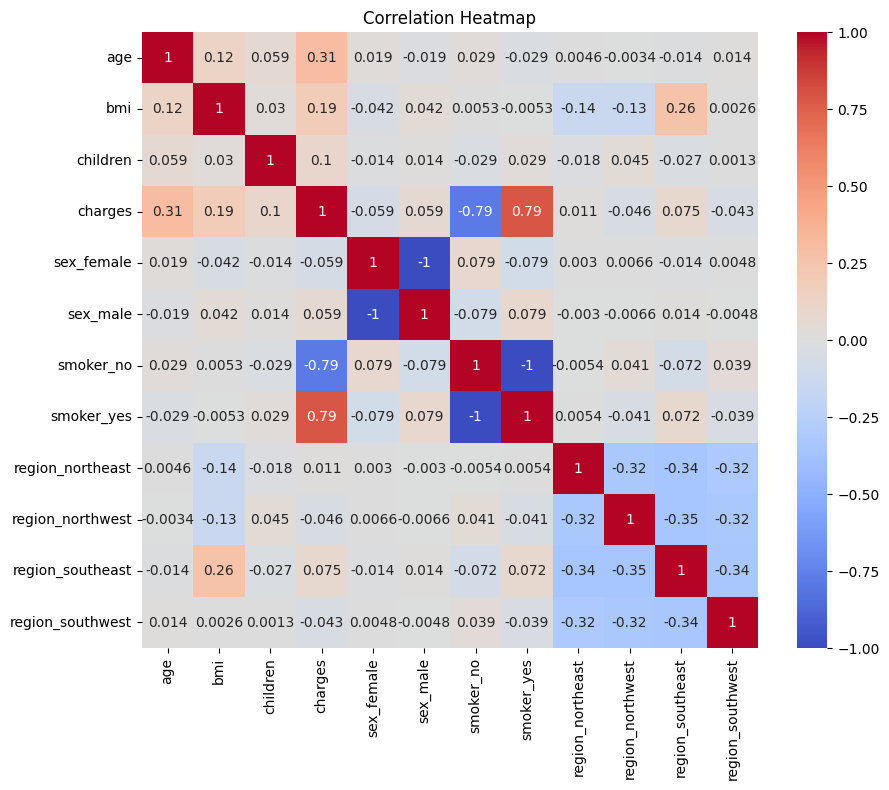

In [ ]:
corr_matrix = encoded_df.corr(method='pearson')
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title("Correlation Heatmap")
plt.show()

##### Summary:

- The variables ('smoker' and 'charges') exhibit comparatively strong correlations among the features (+0.79 for smokers and -0.79 for non-smokers). This indicates that beneficiaries who smoke tend to incur higher charges. In other words, as smoking status changes to 'yes', medical charges significantly increase, and vice versa. However, it is essential to further investigate this finding due to the imbalance in the dataset, where non-smokers are almost four times more prevalent than smokers. Despite this imbalance, the strong correlations highlight the substantial financial impact of smoking on healthcare costs.

- For 'age' and 'smoke', there is no significant statistical relationship between these variables. Non-smokers are fairly distributed across ages 18 to 64. Additionally, 'age' and 'sex' show no variable relationships, with each age group having an approximately equal number of female and male samples

- The pair of 'age' and 'charges' has a relatively strong correlation compared to other pairs. This is followed by the correlations between 'region_southeast' and 'bmi', as well as between 'charges' and 'bmi'. It seems that 'bmi' is one of the most influential features aside from 'charges' in the correlation matrix.

- Since 'charges' is the target variable, it should have closer observation. The features with the strongest to weakest correlations with 'charges' are ranked as follows: 'smoker', 'age', 'bmi', 'children', 'region', and 'sex'.






### Additional Analysis

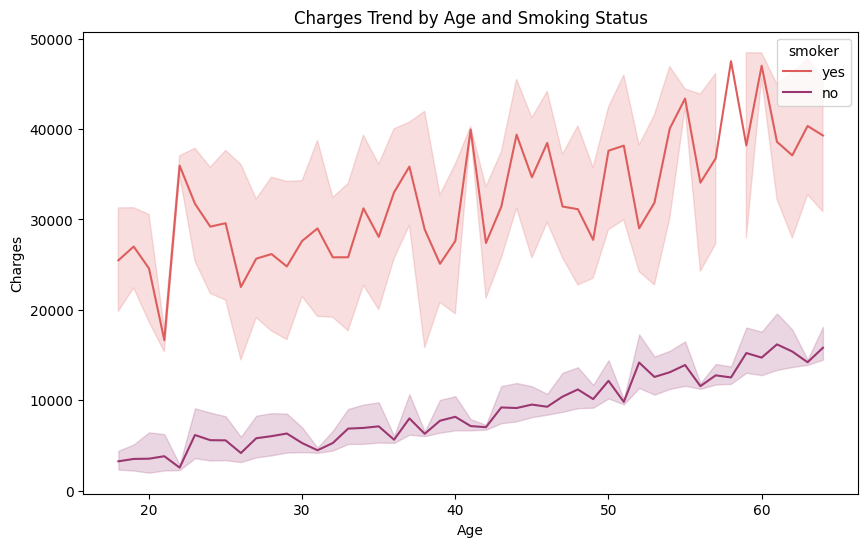

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='age', y='charges', hue='smoker', palette='flare')
plt.title("Charges Trend by Age and Smoking Status")
plt.xlabel("Age")
plt.ylabel("Charges")
plt.show()

<ipython-input-30-84c543637a34>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='BMI_Segment', y='charges', data=df, palette='crest')


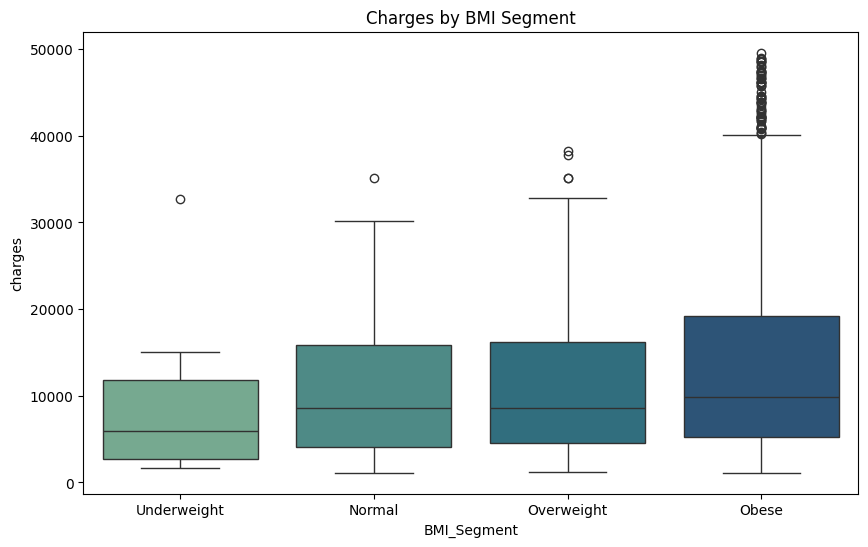

In [ ]:
bmi_segments = pd.cut(df['bmi'], bins=[0, 18.5, 25, 30, float('inf')], labels=['Underweight', 'Normal', 'Overweight', 'Obese'])
df['BMI_Segment'] = bmi_segments
plt.figure(figsize=(10, 6))
sns.boxplot(x='BMI_Segment', y='charges', data=df, palette='crest')
plt.title("Charges by BMI Segment")
plt.show()

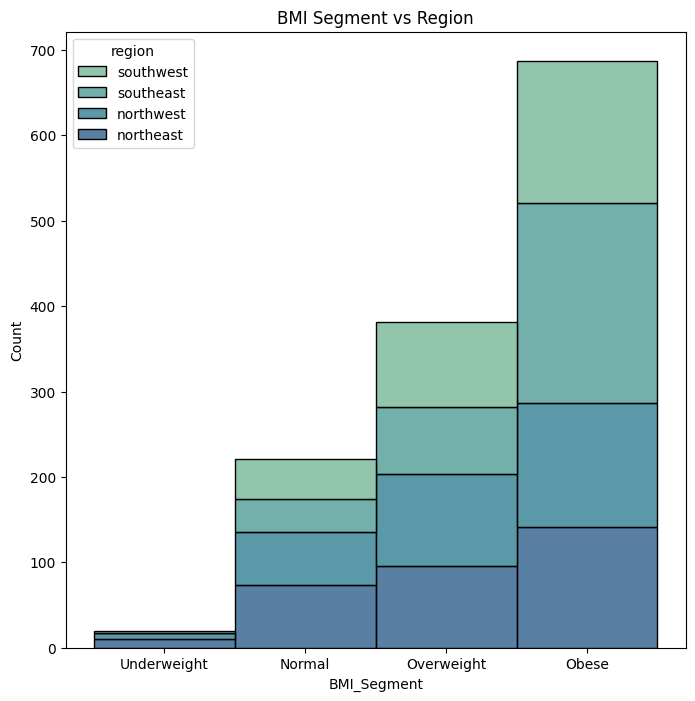

In [ ]:
plt.figure(figsize=(8, 8))
sns.histplot(binwidth=0.5, x="BMI_Segment", hue="region", data=df, multiple="stack", palette='crest')
plt.title("BMI Segment vs Region")
plt.show()

In [ ]:
updated_categorical_col = ['BMI_Segment', 'sex', 'smoker', 'region']

for i in updated_categorical_col:
    obs=df[i].value_counts()
    avg_claim=df.groupby(i)["charges"].mean()
    display(pd.DataFrame({"Count":obs, "Average Charge":avg_claim.map('${:,.2f}'.format)}).sort_values('Count', ascending=False))

,Count,Average Charge
BMI_Segment,,
Obese,687,"$15,212.93"
Overweight,381,"$11,023.27"
Normal,221,"$10,499.44"
Underweight,20,"$8,139.34"


,Count,Average Charge
sex,,
male,658,"$13,783.53"
female,651,"$12,388.25"


,Count,Average Charge
smoker,,
no,1044,"$8,448.23"
yes,265,"$31,374.95"


,Count,Average Charge
region,,
southeast,352,"$14,537.36"
northwest,322,"$12,147.79"
northeast,320,"$13,325.50"
southwest,315,"$12,194.97"


In [ ]:
top_charges = df.nlargest(5, 'charges')
print("Top 5 Highest Charges:")
print(top_charges[['age', 'sex', 'smoker', 'charges', 'children', 'BMI_Segment']])

Top 5 Highest Charges:
      age     sex smoker      charges  children BMI_Segment
1241   64    male    yes  49577.66240         2       Obese
1062   59    male    yes  48970.24760         1       Obese
488    44  female    yes  48885.13561         0       Obese
175    63  female    yes  48824.45000         0       Obese
530    57    male    yes  48675.51770         1       Obese


#### Summary:

- The graph of 'Charges Trend by Age and Smoking Status' shows that beneficiaries who smoke have significantly higher healthcare costs across all ages. Beneficiaries aged 60 and above who smoke incur the highest healthcare insurance claim amounts.

- BMI Impact on Charges: Segmentation analysis based on BMI categories (underweight, normal, overweight, obese) gives the following insights:
  - Underweight Group (<18.5): This group has the lowest medical insurance charges, with costs generally within 15000.
  - Normal (18.5-24.9) and Overweight (25-30) Groups: These groups show similar mean values and distribution of charges.
  - Obese Group (>30): This group has higher overall charges, with all charges exceeding $40,000 coming from this group. This aligns with the statistical summary indicating that the top 5 highest claims are all from the obese group.

- Most of the underweight beneficiaries are from the Northeast region, while most of the obese beneficiaries are from the Southeast region.



## **Insights and Recommendations**

From the insurance company's viewpoint, the primary business value of this dataset is to investigate methods in order to reduce the insurance claims made by beneficiaries. Identifying the factors that increase and decrease healthcare costs ('charges') is crucial in this data analysis. These insights can help adjust insurance plans or premiums and create health programs to reduce smoking. This could lower healthcare costs and improve the health of beneficiaries.

### **Key Findings**

1. Smoking Status and Healthcare Charges:
  The beneficiaries who smoke have significantly higher healthcare expenses compared to non-smokers across all age groups. Older smokers (60 and above) have the highest medical claims. It might because of the smoking is associated with numerous health issues which can lead to increased medical costs.

2. Age and Healthcare Charges:
  There is a positive correlation between age and medical charges. As age increases, medical expenses also tend to rise. Older beneficiaries have higher medical costs. It is likely due to they are more likely to develop health issues that require medical attention. Their age-related health issues could contribute to higher healthcare expenses.

3. BMI and Healthcare Expenses:
  The beneficiaries with higher BMI, particularly those classified as obese, have significantly higher medical charges. The highest claims are predominantly from the obese group. Meanwhile, those classified as underweight generally have lower healthcare expenses. This might because of obesity is normally associated with various health problems such as high blood pressure, diatese and more. These could be the reasons of increased healthcare costs.


4. Region and Healthcare Expenses:
   The Southeast region has higher average charges compared to other regions. It might due to this region has the highest number of smokers and obese beneficiaries which can cause to higher healthcare costs.

5. Number of Dependent and Healthcare Expenses:
  There is a weak positive relationship between the number of children and healthcare charges. Families with more children tend to have slightly higher medical expenses. The reason could be more dependents typically mean higher medical costs due to increased healthcare needs.

#### Predictive Insights

- Model Selection: Linear Regression and Polynomial Regression are selected to predict the healthcare charges. It is because these models are suitable for regression tasks and can provide coefficients that help for analyzing the impact of each predictor on healthcare costs.


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import  mean_absolute_error, mean_squared_error, r2_score


X=encoded_df.drop(['charges'],axis=1)
y=encoded_df['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)

lr_mae = mean_absolute_error(y_test, lr_predictions)
lr_mse = mean_squared_error(y_test, lr_predictions)
lr_r2 = r2_score(y_test, lr_predictions)

print(f'Linear Regression Evaluation:')
print(f'Mean Absolute Error (MAE): {lr_mae}')
print(f'Mean Squared Error (MSE): {lr_mse}')
print(f'R^2: {lr_r2}')

# Polynomial Regression Model
poly = PolynomialFeatures(degree=2)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

poly_model = LinearRegression()
poly_model.fit(X_poly_train, y_train)
poly_predictions = poly_model.predict(X_poly_test)

poly_mae = mean_absolute_error(y_test, poly_predictions)
poly_mse = mean_squared_error(y_test, poly_predictions)
poly_r2 = r2_score(y_test, poly_predictions)

print(f'\nPolynomial Regression Evaluation:')
print(f'Mean Absolute Error (MAE): {poly_mae}')
print(f'Mean Squared Error (MSE): {poly_mse}')
print(f'R^2: {poly_r2}')

print(f'\nLinear Regression Coefficients:')
for feature, coef in zip(X.columns, lr_model.coef_):
    print(" - {}: {:.2f}".format(feature, coef))

print(f'\nPolynomial Regression Coefficients:')
for feature, coef in zip(X.columns, poly_model.coef_):
    print(" - {}: {:.2f}".format(feature, coef))

Linear Regression Evaluation:
Mean Absolute Error (MAE): 3969.0341267772064
Mean Squared Error (MSE): 30444091.526395813
R^2: 0.7787373616773112

Polynomial Regression Evaluation:
Mean Absolute Error (MAE): 2869.7470628108103
Mean Squared Error (MSE): 19320147.228007097
R^2: 0.859584354989038

Linear Regression Coefficients:
 - age: 256.45
 - bmi: 319.26
 - children: 553.57
 - sex_female: 30.78
 - sex_male: -30.78
 - smoker_no: -11581.50
 - smoker_yes: 11581.50
 - region_northeast: 689.06
 - region_northwest: 186.72
 - region_southeast: -361.43
 - region_southwest: -514.34

Polynomial Regression Coefficients:
 - age: -0.00
 - bmi: -56.16
 - children: 502.59
 - sex_female: 611.22
 - sex_male: 229.85
 - smoker_no: -229.85
 - smoker_yes: 3594.42
 - region_northeast: -3594.42
 - region_northwest: 5.21
 - region_southeast: -15.02
 - region_southwest: -66.73


#### Explanation:

- Model Performance:
  - The Polynomial Regression model outperforms the Linear Regression model. It has a lower MAE and MSE, and a higher R² value, which indicates its better fit and prediction accuracy.
  - The R² value for Polynomial Regression (0.86) suggests that it explains 86% of the variance in healthcare charges, compared to 78% explained by Linear Regression.

- Key Predictors from Linear Regression:
  - Age: Each additional year in age increases charges by 256.45.
  - BMI: Each unit increase in BMI raises charges by 319.26.
  - Children: Each additional child increases charges by 553.57.
  - Sex: Male have 30.78 higher charges than female.
  - Smoking Status: Smokers have significantly higher charges ($11581.50 more) than non-smokers.
  - Region:
    - Northeast: 689.06 higher charges.
    - Northwest: 186.72 higher charges.
    - Southeast: 361.43 lower charges.
    - Southwest: 514.34 lower charges.

- Key Predictors from Polynomial Regression:
  - Age: The coefficient is effectively zero. That means a negligible direct effect in the polynomial model.
  - BMI: Decreases charges by 56.16. Which indicates a complex relationship when considered with other variables.
  - Children: Each additional child increases charges by 502.59.
  - Sex: Being female increases charges by 611.22, and male decreases charges by 229.85.
  - Smoking Status: Smokers increase charges by 3594.42 in this model.
  - Region:
    - Northeast: Decreases charges by 3594.42.
    - Northwest: Minor increase of 5.21.
    - Southeast: Minor decrease of 15.02.
    - Southwest: Minor decrease of 66.73.

### **Recommendations / Hypotheses For Futher Investigation**

- Different regions have different insurance charges shows that there is also difference in healthcare charges by taking consideration of various factors. Therefore doing analysis by region can be suggested for better understanding.

#### Bussiness Implications

- Based on analysis, smoking and BMI are influential on the insurance charges which related to the beneficiaries' behaviours. This suggests that these bahviours can be controlled or prevented in order to lower the insurance charges and promote healthier lifestyle. Beneficiaries can invest themselves into fitness training programs or smoking prevention programs to control their BMI or smoking behaviour respectively. Beneficiaries can join into these programs held by any organizations, or the insurance can provide one for the beneficiaries. These potentially cost less than the insurance charges itself.
- There are various key factors which contributes to the increment or decrement of the insurance charges. While every beneficiaries have different demographic information and background, insurance company can recommend and/or provide personalized insurance plans or products as a strategy for marketing and customer retention.

#### Limitations and Assumptions

- **Limitation** :
  - This analysis is performed based on historical data, which might not account on any future changes which directly or indirectly affect insurance charges such as healthcare charges or insurance policies.
  - There might be other factors or features that influences the healthcare charges such as any pre-existing conditions.

- **Assumptions** :
  - Historical data is relevant and can be used for future predictions.
  - Available data is sufficient for any main influence of healthcare charges that can be used to do the predictions.